# TAL Labo 1b : Segmentation de textes avec NLTK

**Objectifs**

Le but de cette deuxième partie du Labo 1 du [Cours TAL](https://cyberlearn.hes-so.ch/course/view.php?id=14966) est d'effectuer quelques opérations élémentaires sur les textes en utilisant la boîte à outils [NLTK](http://www.nltk.org/) en Python.  Vous utiliserez l'environnement mis en place dans la partie 1a : [Python 3.7 ou 3.8](https://www.python.org/) avec _notebooks_ [Jupyter](https://jupyter.org/), soit localement sur votre ordinateur (avec ou sans Conda) ou en ligne sur [Google Colab](https://colab.research.google.com).

Vous utiliserez NLTK pour obtenir des textes en ligne ou localement, puis vous les segmenterez en phrases et en mots (appelés aussi _tokens_).  Vous calculerez aussi des statistiques sur ces textes.  Vous travaillerez d'abord sur des textes en anglais (1b et 1c), puis en français (1d).

## 1. NLTK: Natural Language Toolkit

Pour ajouter NLTK à votre installation locale de Python, suivez les instructions sur le [site web NLTK](http://www.nltk.org/install.html).  Sur Google Colab, NLTK est déjà installé.

Pour utiliser NLTK en Python (y compris dans un _notebook_ Jupyter), vous pouvez écrire `import nltk`, puis accéder à toutes les commandes avec le préfixe `nltk.`.  Si vous écrivez `from nltk.book import *`, cela importera des commandes et des variables (p.ex. une collection de textes) qui seront accessibles sans utiliser le préfixe. 

**Remarques**
* Le but de ce laboratoire est de vous initier à NLTK.  Vous pouvez aussi parcourir le [Chapitre 1](http://www.nltk.org/book/ch01.html) du [livre NLTK (*NLP with Python*)](http://www.nltk.org/book/) et essayer les commandes indiquées.  
* Veuillez noter que le [livre en ligne](http://www.nltk.org/book/) est mis à jour pour Python 3, mais la [version imprimée](http://shop.oreilly.com/product/9780596516499.do) que l'on peut parfois trouver en PDF est pour Python 2. 
* NLTK inclut un gestionnaire de téléchargements qui peut être invoqué depuis un interpréteur Python en ligne de commande (écrire `python3` en ligne de commande) avec les deux commandes `import nltk` puis `nltk.download()`.  Cela vous permettra de télécharger de nombreux corpus _additionnels_ (i.e. collections de textes), mais que nous n'utiliserons pas en laboratoire.

In [4]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alexandre\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Écrivez une phrase en anglais (liste de mots / string) que vous appelerez `sentence1`.  

Affichez sa longueur avec `len()`.  

Utilisez `nltk.bigrams` pour générer tous les bi-grammes (couples de mots adjacents) à partir de cette liste.  Un exemple est montré dans la [section 3.3 du chapitre 1 du livre NLTK](http://www.nltk.org/book/ch01.html#collocations-and-bigrams).  

Enfin, trier les bi-grammes par ordre alphabétique et afficher le résultat.

In [5]:
# Please write your Python code in this cell and execute it.
sentence = ["hello",",","word","!"]
len(sentence)
list(nltk.bigrams(sentence))

[('hello', ','), (',', 'word'), ('word', '!')]

Défnissez une chaîne appelée `string2` contenant une phrase.  Utilisez le *tokenizer* de NLTK (fonction `nltk.word_tokenize`, expliquée dans la [section 3.1 du livre NLTK](http://www.nltk.org/book/ch03.html#sec-accessing-text)) pour segmenter la chaîne en mots, qui seront rassemblés dans une liste que vous appelerez `sentence2`.  Affichez cette liste.

In [6]:
string2 = "je suis une phrase."
sentence2 = nltk.word_tokenize(string2)
print(sentence2)

['je', 'suis', 'une', 'phrase', '.']


## 2. Utiliser NLTK pour télécharger, segmenter et sauvegarder un texte

Inspirez-vous du [chapitre 3 (3.1. Processing Raw Text) du livre NLTK](http://www.nltk.org/book/ch03.html) pour télécharger un fichier avec du texte en ligne, par exemple un livre anglais du Projet Gutenberg.  Stocker le contenu dans une chaîne.

In [7]:
from urllib import request
# Please write your Python code below and execute it.
url = "http://www.gutenberg.org/files/2554/2554-0.txt"
response = request.urlopen(url)
raw = response.read().decode('utf8')

En inspectant la chaîne précédente, déterminez quelle partie du début et de la fin il faut enlever pour garder le texte principal.  Vous pouvez utiiser la notation dite de *slicing* en Python, ou identifier les chaînes où commence et finit le véritable texte.  Quelle est la longueur de ce texte en caractères ?  (Lien utile : [support d'Unicode dans Python](https://docs.python.org/3.7/howto/unicode.html).)

In [8]:
# Please write your Python code below and execute it.
start = "*** START OF THIS PROJECT GUTENBERG EBOOK CRIME AND PUNISHMENT **"
end = "*** END OF THIS PROJECT GUTENBERG EBOOK CRIME AND PUNISHMENT ***"
# print(raw)

raw = raw[raw.find(start)+len(start)+1:raw.find(end)]
print(raw)






Produced by John Bickers; and Dagny





CRIME AND PUNISHMENT

By Fyodor Dostoevsky



Translated By Constance Garnett




TRANSLATOR’S PREFACE

A few words about Dostoevsky himself may help the English reader to
understand his work.

Dostoevsky was the son of a doctor. His parents were very hard-working
and deeply religious people, but so poor that they lived with their five
children in only two rooms. The father and mother spent their evenings
in reading aloud to their children, generally from books of a serious
character.

Though always sickly and delicate Dostoevsky came out third in the
final examination of the Petersburg school of Engineering. There he had
already begun his first work, “Poor Folk.”

This story was published by the poet Nekrassov in his review and
was received with acclamations. The shy, unknown youth found himself
instantly something of a celebrity. A brilliant and successful career
seemed to open before him, but those hopes were soon dashed. In 1849 he
was 

Vous allez maintenant segmenter le texte en phrases et les écrire dans un fichier avec une phrase par ligne.  Vous allez également segmenter chaque phrase en _tokens_ (mots et ponctuations), et créer un autre fichier, avec une phrase par ligne, et un espace entre chaque _token_.  Vous aurez besoin des fonctions suivantes de nltk:
* `nltk.sent_tokenize(...)` (documentée [ici](https://www.nltk.org/api/nltk.tokenize.html#nltk.tokenize.word_tokenize)) (notez que le nom "sentence tokenize" n'est pas très logique)
* `nltk.word_tokenize(...)` (documentée [ici](https://www.nltk.org/api/nltk.tokenize.html#nltk.tokenize.sent_tokenize))

**Segmentez le texte en phrases avec NLTK.** Affichez le nombre de phrases obtenues, et un court extrait de 5-6 phrases.  Comment appréciez-vous la qualité de la segmentation ?  *Note :* si certains caractères spéciaux vous semblent péjorer la segmentation, vous pouvez les remplacer dans la chaîne globale avec la fonction `.replace('s1', 's2')`.

In [9]:
# Please write your Python code in this cell and execute it.
sentences = nltk.sent_tokenize(raw.replace("\r\n"," "))


print(sentences[1:10])

['Dostoevsky was the son of a doctor.', 'His parents were very hard-working and deeply religious people, but so poor that they lived with their five children in only two rooms.', 'The father and mother spent their evenings in reading aloud to their children, generally from books of a serious character.', 'Though always sickly and delicate Dostoevsky came out third in the final examination of the Petersburg school of Engineering.', 'There he had already begun his first work, “Poor Folk.”  This story was published by the poet Nekrassov in his review and was received with acclamations.', 'The shy, unknown youth found himself instantly something of a celebrity.', 'A brilliant and successful career seemed to open before him, but those hopes were soon dashed.', 'In 1849 he was arrested.', 'Though neither by temperament nor conviction a revolutionist, Dostoevsky was one of a little group of young men who met together to read Fourier and Proudhon.']


Enregistrez le résultat au format texte, en écrivant chaque phrase sur une ligne.  Vérifiez le résultat en examinant le fichier avec un éditeur de texte.

In [10]:
import os

In [11]:
filename1 = "sample_text_1.txt"
# Pour un fichier local : chemin relatif par rapport au notebook
# Pour Google Colab, p.ex.: /content/gdrive/My Drive/sample_text_1.txt
if os.path.exists(filename1): 
    os.remove(filename1)
fd = open(filename1, 'a', encoding='utf8')
# Please write your Python code below and execute it.
tree = []
for sentence in sentences[1:] :
    tree.append(nltk.word_tokenize(sentence))
    fd.write(sentence + "\n")
    
fd.close();


**Segmentez maintenant chaque phrase en tokens (mots et ponctuations).**  Stockez le résultat dans une nouvelle variable (liste de listes).  Affichez quelques phrases et commentez la qualité de la tokenisation.

In [12]:
# Please write your Python code in this cell and execute it.
listeOfSentence =  [nltk.word_tokenize(t) for t in sentences]

for someLigne in listeOfSentence[0:10]:
    print(someLigne)


['Produced', 'by', 'John', 'Bickers', ';', 'and', 'Dagny', 'CRIME', 'AND', 'PUNISHMENT', 'By', 'Fyodor', 'Dostoevsky', 'Translated', 'By', 'Constance', 'Garnett', 'TRANSLATOR', '’', 'S', 'PREFACE', 'A', 'few', 'words', 'about', 'Dostoevsky', 'himself', 'may', 'help', 'the', 'English', 'reader', 'to', 'understand', 'his', 'work', '.']
['Dostoevsky', 'was', 'the', 'son', 'of', 'a', 'doctor', '.']
['His', 'parents', 'were', 'very', 'hard-working', 'and', 'deeply', 'religious', 'people', ',', 'but', 'so', 'poor', 'that', 'they', 'lived', 'with', 'their', 'five', 'children', 'in', 'only', 'two', 'rooms', '.']
['The', 'father', 'and', 'mother', 'spent', 'their', 'evenings', 'in', 'reading', 'aloud', 'to', 'their', 'children', ',', 'generally', 'from', 'books', 'of', 'a', 'serious', 'character', '.']
['Though', 'always', 'sickly', 'and', 'delicate', 'Dostoevsky', 'came', 'out', 'third', 'in', 'the', 'final', 'examination', 'of', 'the', 'Petersburg', 'school', 'of', 'Engineering', '.']
['There

Calculez le nombre total de _tokens_ obtenus.

In [13]:
# Please write your Python code in this cell and execute it.
import functools 

print (functools.reduce(lambda a,b : a+b, (len(ligne) for ligne in listeOfSentence)))


254329


Enregistrez le résultat au format texte, en écrivant chaque phrase sur une ligne et en insérant un espace entre chaque _token_.  Vérifiez le résultat en examinant le fichier avec un éditeur de texte.

In [14]:
filename2 = "sample_text_2.txt"
# Pour un fichier local : chemin relatif par rapport au notebook
# Pour Google Colab, p.ex.: /content/gdrive/My Drive/sample_text_2.txt
if os.path.exists(filename2): 
    os.remove(filename2)
fd = open(filename2, 'a', encoding='utf8')
# Please write your Python code below and execute it.

for ligne in listeOfSentence : 
    for token in ligne : 
        fd.write(token + " ")
    fd.write("\n")
fd.close()


Il est également possible de *tokeniser un texte sans le segmenter préalablement en phrases*.
* Effectuez cette opération directement sur la chaîne de caractères contenant tout le texte.  
* Affichez et observez un court extrait. 
* Demandez le nombre total de tokens et comparez-le avec le nombre précédent.  
* Il n'est pas demandé ici d'écrire le résultat dans un fichier.

In [15]:
# Please write your Python code in this cell and execute it.
tokens =  nltk.word_tokenize(raw)
for t in tokens[0:10]:
    print(t)

Produced
by
John
Bickers
;
and
Dagny
CRIME
AND
PUNISHMENT


## 3. Calculer diverses statistiques avec NLTK
Pour calculer des statistiques, il faut d'abord créer un objet de type `nltk.Text`.  Ces objets peuvent être créés avec : 
1. la chaîne de caractères constituant le texte
2. la liste de tous les mots du texte (chaînes)
3. la liste de toutes les phrases (liste de listes)

**Attention:**

* seule l'option (2) permet d'utiliser correctement les méthodes de `nltk.Text`
* les méthodes `nltk.word_tokenize()` et `nltk.sent_tokenize()` s'appliquent à des chaînes, pas des `nltk.Text`

Créez et stockez dans une variable un objet `nltk.Text` à partir de la liste des tokens de votre texte.  (Vous pouvez appeler ici `nltk.word_tokenize`.)

In [16]:
# Please write your Python code in this cell and execute it.
Stats =  nltk.Text(tokens)

Le [chapitre 1 du livre NLTK](http://www.nltk.org/book/ch01.html) montre des exemples d'opérations que l'on peut effectuer sur un objet `nltk.Text`.  Par exemple, on peut afficher les occurrences d'un mot et leur contexte immédiat avec la méthode `concordance`, ou trouver des mots qui ont des contextes semblables à un mot donné avec `similar`.  Veuillez expérimenter ci-dessous avec ces deux méthodes et afficher un résultat à chaque fois.

In [17]:
# Please write your Python code in this cell and execute it.
Stats.concordance("crime")

Displaying 25 of 51 matches:
Produced by John Bickers ; and Dagny CRIME AND PUNISHMENT By Fyodor Dostoevsky 
lf and through it he became great. ” CRIME AND PUNISHMENT PART I CHAPTER I On a
at do you think , would not one tiny crime be wiped out by thousands of good de
rial impossibility of concealing the crime , as in the criminal himself . Almos
 just before the perpetration of the crime , continued with equal violence at t
 equal violence at the moment of the crime and for longer or shorter time after
hether the disease gives rise to the crime , or whether the crime from its own 
s rise to the crime , or whether the crime from its own peculiar nature is alwa
e reason that his design was “ not a crime ... . ” We will omit all the process
ed , and probably this was his first crime ! The supposition that it was a calc
supposition that it was a calculated crime and a cunning criminal doesn ’ t wor
could only murder . It was his first crime , I assure you , his first crime ; h
rst crime ,

In [18]:
# Please write your Python code in this cell and execute it.
Stats.similar("thousand")

hundred time little man word quarter hurry boy name child chair crime
few doctor third letter minutes subject years for


En utilisant la méthode `collocation_list`, veuilez afficher les 10 collocations les plus fréquentes dans votre texte.

In [19]:
nltk.download('stopwords')
Stats.collocation_list(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alexandre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['Katerina Ivanovna',
 'Pyotr Petrovitch',
 'Pulcheria Alexandrovna',
 'Avdotya Romanovna',
 'Rodion Romanovitch',
 'Marfa Petrovna',
 'Sofya Semyonovna',
 'old woman',
 'Porfiry Petrovitch',
 'Amalia Ivanovna']

On peut déterminer le vocabulaire d'un texte (c'est-à-dire la liste des _types_) simplement en convertissant la liste des mots (occurrences ou _tokens_) à un `set` en Python.  
* Veuillez calculer ainsi le vocabulaire de votre texte.
* Combien de mots différents a-t-il ?  (En incluant les ponctuations et tout autre symbole.) 
* Quels sont les mots qui ont plus de 15 lettres ?  (Ou une autre taille qui vous semble intéressante.)

In [20]:
# Please write your Python code in this cell and execute it.
vocabulaire = set(Stats)
len(Stats)
for w in vocabulaire : 
    if len(w) > 15:
        print(w)

Cough-cough-cough
half-broken-down
terrible-looking
evil-intentioned
Governor-General
misunderstanding
_psychologically_
Schleswig-Holstein
straight-forward
grey-and-rainbow-coloured
conscience-prick
circumstantially
delicate-looking
horrible-looking
sinister-looking
disproportionate
enthusiastically
waistcoat-pocket
poverty-stricken
superciliousness
frightened-looking
self-confidently
_Hof-kriegsrath_
indistinguishable
disproportionately
governor-general
indiscriminately
cross-examination
pawnbroker-woman
well-proportioned


**Distributions de fréquence (Frequency Distributions)**

NLTK peut facilement calculer les fréquences de tous les _tokens_ dans un `nltk.Text`.  Le résultat est stocké dans un objet de type `FreqDist` (pour _frequency distribution_) comme montré dans la [section 3.1 du chapitre 1 du livre NLTK](http://www.nltk.org/book/ch01.html#frequency-distributions).  À partir de là, on peut déterminer les mots les plus fréquents.

Veuillez construire la distribution de fréquences de votre texte.

In [21]:
# Please write your Python code in this cell and execute it.
fdist1 = nltk.FreqDist(Stats)
print(fdist1)

<FreqDist with 11103 samples and 254329 outcomes>


Affichez les mots qui ont plus de 4 lettres parmi les 70 mots les plus fréquents.

In [22]:
# Please write your Python code in this cell and execute it.
for w in fdist1.most_common(70):
    if len(w[0]) > 4: 
        print(w)

('Raskolnikov', 782)
('there', 597)
('would', 552)
('about', 523)


## 4. Graphiques
La librairie `matplotlib` permet d'afficher les statistiques des textes sous forme graphique.  Pour la rendre accessible dans le _notebook_ (une fois installée dans Python), il faut exécuter les deux lignes suivantes.

Nous allons utiliser les fonctions graphiques de NLTK, mais il est possible de générer directement des graphiques à partir de deux listes `x_values` et `y_values` avec la commande `matplotlib.pyplot.plot(x_values, y_values)`.

In [23]:
import matplotlib.pyplot
%matplotlib inline

Affichez le graphique cumulatif des nombres d'occurrences des 70 mots les plus fréquents de votre texte, en vous inspirant de la  [section 3.1 du chapitre 1 du livre NLTK](http://www.nltk.org/book/ch01.html#frequency-distributions).

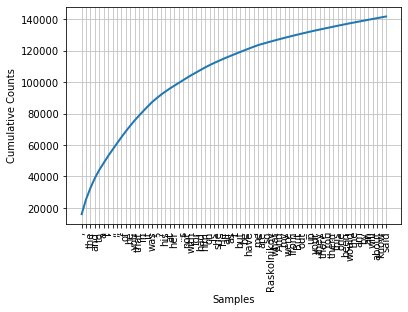

In [24]:
# Please write your Python code in this cell and execute it.
fdist1.plot(70,cumulative=True)

Maintenant, construisez une liste avec la longueur de chaque _token_ du texte (la liste aura donc autant de nombres que de tokens).  Créez un nouvel objet `FreqDist` à partir de cette liste, et affichez la distribution (cette fois-ci _non_-cumulative) des nombres d'occurrences.  Quelle est la longueur la plus fréquente ?  Comment évolue la longueur en fonction de la fréquence ?

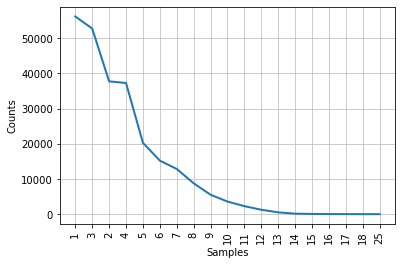

In [25]:
# Please write your Python code in this cell and execute it.
fdist2 =  nltk.FreqDist([len(t) for t in Stats])
fdist2.plot(100,cumulative=False)

**Approximation de la Loi de Zipf.**

Générez la liste des fréquences des mots de votre texte par ordre décroissant (sans les mots, seulement les valeurs des fréquences).  Limitez cette liste à *N&nbsp;* valeurs (par exemple *N&nbsp;* = 100).  Affichez avec `matplotlib.pyplot.plot` la courbe en fonction du rang, c'est-à-dire le rang (1, 2, 3, ..., *N&nbsp;*) sur l'axe *x&nbsp;* et la fréquence sur l'axe *y&nbsp;*.

Ajoutez une deuxième courbe (dans la même commande `plot`) de la forme *y&nbsp;* = *a&nbsp;* / (*x&nbsp;* + *b&nbsp;*) en choississant des valeurs de *a&nbsp;* et *b&nbsp;* qui vous rapprochent autant que possible de la courbe des fréquences.

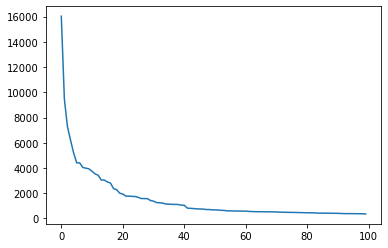

In [36]:
# Please write your Python code in this cell and execute it.
N= 100
liste =  list(map(lambda x: x[1],fdist1.most_common(N)))

matplotlib.pyplot.plot(range(len(liste)), liste)

## Fin de la partie 1b
Veuillez nettoyer autant que possible ce _notebook_, exécutez une dernière fois toutes les cellules pour obtenir les résultats demandés, et enregistrez le _notebook_.  Puis ajoutez-le dans une archive _zip_ avec les _notebook_ des parties 1c et 1d, et soumettez l'archive individuellement sur Cyberlearn (_Laboratoire 1_). 